**CHEG667-013: Computers in Chemical Engineering**

*HW#2: Polymer Rheology Exploration with Pandas*

By Robert Norden

Import Libraries

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as ipy
import math

How many columns does the rheological data have?

In [113]:
#Import the data

polymerData = pd.read_csv('polymer melt rheological data.csv')
print('There are ' + str(len(polymerData.columns))+ ' different columns in the dataframe')


There are 11 different columns in the dataframe


In [114]:
polymerData.columns

Index(['Material', 'Temperature C', 'Viscosity (Pas)', 'N1 (Pa)',
       'Shear rate (1/s)', 'Geometry', 'Stress (Pa)', 'Frequency (rad/s)',
       'G' (Pa)', 'G" (Pa)', 'Complex viscosity (Pas)'],
      dtype='object')

How many different materials are there?

In [115]:
print('There are ' + str(len(polymerData['Material'].unique())) + ' different materials in the dataframe')

There are 3 different materials in the dataframe


How many different geometries exist?

print('There are ' + str(len(polymerData['Geometry'].unique())) + ' different geometries in the dataframe')

How many different temperatures are present for the material 'LDPE'?

In [116]:
print("There are " + str(len(polymerData[polymerData['Material'] == 'LDPE']['Temperature C'].unique())) +" different temperatures present in LDPE");

There are 3 different temperatures present in LDPE


Plot the rheological data for LDPE with shear rate as the x-axis

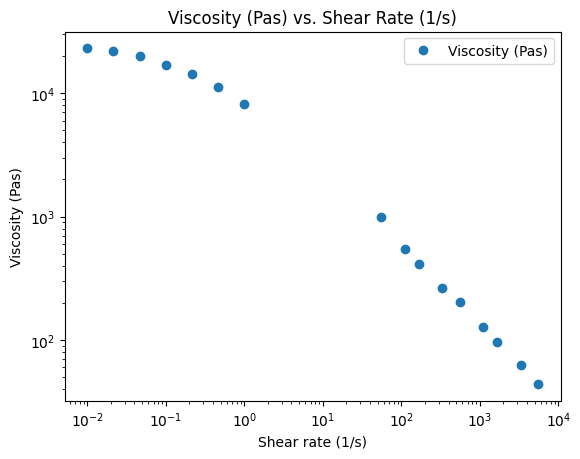

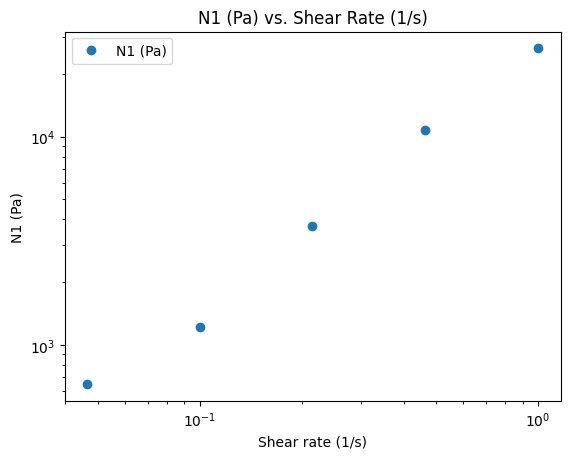

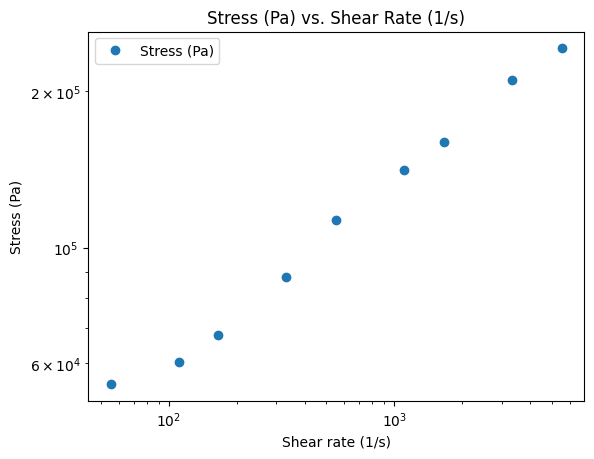

In [126]:
LDPE170C = polymerData[(polymerData['Material'] == 'LDPE') & (polymerData['Temperature C'] == 170)].dropna(subset='Shear rate (1/s)')


for column in LDPE170C.columns:
    if (column != 'Temperature C') and (column != 'Material') and (column != 'Geometry') and (column != 'Shear rate (1/s)') and (column != 'Frequency (rad/s)'):
            if(not(LDPE170C[column].isna().all())):
                LDPE170C.plot(x='Shear rate (1/s)',y=column,loglog=True,style='o')
                plt.ylabel(column)
                plt.title(column + ' vs. Shear Rate (1/s)')


In [ ]:
fittableData = LDPE170C[['Shear rate (1/s)','Viscosity (Pas)']]

def costFunction(guessViscosity:list[float],knownViscosity:list[float])->float:
    RSS = 0
    for i in range(len(knownViscosity)):
        RSS += (guessViscosity[i] - knownViscosity[i])**2
    return RSS

def function(x,etaInf,etaZero,tr,a,n):
    return etaInf + (etaZero - etaInf)*(1 + (tr * x) ** a) ** ((n-1)/a)

learningRate = 0.5

etaZero = 1
etaInf = 1
tr = 1
a = 1
n = 0.5

x = fittableData['Shear rate (1/s)']

for i in range(len(fittableData['Shear rate (1/s)'])):
    print(i)
etaInfGradient = 1 - (1 + (tr * x) ** a) ** ((n-1)/ a)
etaZeroGradient = (1 + (tr * x) ** a) ** ((n-1)/ a)
trGradient = (etaZero - etaInf)*(n-1)*x*((tr*x) ** (a-1))*(1 + (tr * x) ** a) ** (-1 + ((n-1)/a))
aGradient = ((etaZero - etaInf)*(1 + (tr*x) ** a) ** ((n-1)/ a)) * (((n-1)*(tr * x) ** a) * math.log(tr * x) / (a * (1 + (tr * x) ** a)) - ((n-1)*math.log(1 + (tr * x) ** a) / a ** 2))
nGradient = (((etaZero - etaInf)*(1 + (tr * x) ** a) ** ((n-1)/ a)) * math.log(1 + (tr * x) ** a)) / a




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


TypeError: cannot convert the series to <class 'float'>